In [1]:
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

with open("./sentiment labelled sentences/full_set.txt") as f:
    content = f.readlines()
    
content = [x.strip() for x in content]
sentences = [x.split('\t')[0] for x in content]
labels = [x.split('\t')[1] for x in content]

y = np.array(labels, dtype='int8')
y = 2*y - 1

In [9]:
def full_remove(x, removal_list):
    for w in removal_list:
        x = x.replace(w, ' ')
    return x

In [17]:
digits = [str(x) for x in range(10)]

digit_less = [full_remove(x, digits) for x in sentences]
punc_less = [full_remove(x, list(string.punctuation)) for x in digit_less]
sents_lower = [x.lower() for x in punc_less]

In [18]:
sents_lower[0:2]

['so there is no way for me to plug it in here in the us unless i go by a converter ',
 'good case  excellent value ']

In [19]:
with open("./stopwords") as f:
    stop_word = f.readlines()
stop_word = [x.strip() for x in stop_word]
len(stop_word)

186

In [21]:
sents_split = [x.split() for x in sents_lower]
sents_processed = [" ".join(list(filter(lambda a:a not in stop_word, x))) for x in sents_split]
sents_processed[0:5]

['way plug us unless go converter',
 'good case excellent value',
 'great jawbone',
 'tied charger conversations lasting minutes major problems',
 'mic great']

In [22]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=None, preprocessor=None, stop_words=None,
                            max_features=4500)
data_features = vectorizer.fit_transform(sents_processed)
data_mat = data_features.toarray()

In [37]:
np.random.seed(0)
aa = np.where(y==-1)
print(len(aa), len(y), len(aa[0]))
#help(np.where)

1 3000 1500


In [41]:
np.random.seed(0)
test_inds = np.append(np.random.choice((np.where(y==-1))[0], 250, replace=False),
                     np.random.choice((np.where(y==1))[0], 250, replace=False))
train_inds = list(set(range(len(labels))) - set(test_inds))

train_data = data_mat[train_inds,]
train_labels = y[train_inds]

test_data = data_mat[test_inds,]
test_labels = y[test_inds]

print(train_data.shape, test_data.shape)

(2500, 4500) (500, 4500)


In [47]:
from sklearn import svm
def fit_classifier(C_value = 1.0):
    clf = svm.LinearSVC(C=C_value, loss='hinge')
    clf.fit(train_data, train_labels)
    
    train_preds = clf.predict(train_data)
    train_error = float(np.sum((train_preds > 0.0) != (train_labels > 0.0)))/len(test_labels)
    
    test_preds = clf.predict(test_data)
    test_error = float(np.sum((test_preds >0.0) != (test_labels >0.0)))/len(test_labels)
    
    return train_error, test_error

In [50]:
cvals = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
for c in cvals:
    train_error, test_error = fit_classifier(c)
    print("Error rate for C = %0.2f: train %0.3f test %0.3f" % (c, train_error, test_error))

Error rate for C = 0.01: train 1.432 test 0.360
Error rate for C = 0.10: train 0.492 test 0.226
Error rate for C = 1.00: train 0.108 test 0.188


/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Error rate for C = 10.00: train 0.044 test 0.214
Error rate for C = 100.00: train 0.036 test 0.286
Error rate for C = 1000.00: train 0.076 test 0.274
Error rate for C = 10000.00: train 0.066 test 0.286


/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [60]:
def cross_validation_error(x,y,C_value,k):
    n = len(y)
    indices = np.random.permutation(n)
    err = 0.0
    
    for i in range(k):
        test_indices = indices[int(i*(n/k)):int((i+1)*(n/k)-1)]
        train_indices = np.setdiff1d(indices, test_indices)
        
        clf = svm.LinearSVC(C=C_value, loss='hinge')
        clf.fit(x[train_indices],y[train_indices])
        
        preds = clf.predict(x[test_indices])
        
        err += float(np.sum((preds>0.0) != (y[test_indices]>0.0)))/len(test_indices)
        
    return err/k

In [61]:
c1 = np.logspace(-4,4,20)
print(c1)
print(len(c1))
#help(plt.xscale)

[1.00000000e-04 2.63665090e-04 6.95192796e-04 1.83298071e-03
 4.83293024e-03 1.27427499e-02 3.35981829e-02 8.85866790e-02
 2.33572147e-01 6.15848211e-01 1.62377674e+00 4.28133240e+00
 1.12883789e+01 2.97635144e+01 7.84759970e+01 2.06913808e+02
 5.45559478e+02 1.43844989e+03 3.79269019e+03 1.00000000e+04]
20


In [72]:
def choose_parameter(x,y,k):
    c_val = np.logspace(-4,4,20)
    valid_error = np.zeros(len(c_val))
    for i in range(len(c_val)):
        valid_error[i] = cross_validation_error(train_data, train_labels, c_val[i], k)
    # plot the error vs the log scale of c_val
    plt.xscale("log")
    plt.plot(c_val, valid_error)
    plt.show()
    
    arg = np.argmin(valid_error)
    print(valid_error)
    return c_val[arg], valid_error[arg]

/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to c

/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to c

/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kilingcheung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to c

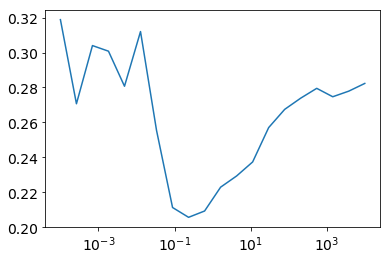

[0.3188755  0.27068273 0.30401606 0.30080321 0.28072289 0.31204819
 0.25542169 0.21124498 0.20562249 0.20923695 0.22289157 0.22931727
 0.2373494  0.25702811 0.26746988 0.27389558 0.27951807 0.2746988
 0.27791165 0.28232932]
Choice of C:  0.23357214690901212
Cross-validation error estimate:  0.20562248995983934
Test error:  0.202


In [74]:
c, err = choose_parameter(train_data, train_labels, 10)
print("Choice of C: ", c)
print("Cross-validation error estimate: ", err)

clf = svm.LinearSVC(C=c, loss='hinge')
clf.fit(train_data, train_labels)
preds = clf.predict(test_data)
error = float(np.sum((preds>0.0) != (test_labels>0.0)))/len(test_labels)
print("Test error: ", error)